In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.firefox.options import Options
from selenium.webdriver.firefox.service import Service
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import csv

firefox_options = Options()
firefox_options.add_argument('-headless')
firefox_binary_path = r"C:\Program Files\Mozilla Firefox\firefox.exe"
firefox_options.binary_location = firefox_binary_path
service = Service(executable_path=r"C:\Users\Ajay\Downloads\geckodriver-v0.33.0-win32\geckodriver.exe")
driver = webdriver.Firefox(service=service, options=firefox_options)

ratings_to_collect = 500

data = []  
url = "https://app.thestorygraph.com/book_reviews/470474cb-e378-497f-aef7-70854c395526"
try:
    driver.get(url)
    collected_ratings = 0  # Reset collected_ratings for each URL
    collected_reviews = set()  # Keep track of collected reviews
    while collected_ratings < ratings_to_collect:
        try:
            ratings = WebDriverWait(driver, 20).until(
                EC.presence_of_all_elements_located((By.XPATH, '//p[@class="mb-2"]'))
            )
            reviews = driver.find_elements(By.XPATH, '//div[contains(@class, "review-explanation")]')
            for rating, review in zip(ratings, reviews):
                review_text = review.text
                if review_text not in collected_reviews:
                    url_rating_review = (url, rating.text, review_text)
                    data.append(url_rating_review)
                    collected_reviews.add(review_text)
                    collected_ratings += 1
                    print(rating.text)
                    print(review_text)
                    if collected_ratings >= ratings_to_collect or len(reviews) < len(ratings):
                        break
            driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        except Exception as e:
            print(f"Error while scraping {url}: {e}")
            break

except Exception as e:
    print(f"Error: {e}")

finally:
    driver.quit()

Anna_Karenina_Book = pd.DataFrame(data, columns=["URL", "Rating", "Review"])


3.0
so many thoughts. will write them down in a bit.
4.0
Me llegó en tan buen momento este libro, es precioso.
Me encanto la manera en que desarrolla cada personaje, todos con distintos sentimientos peculiares y que podemos encontrar dentro de nuestra sociedad, por ejemplo, la inocencia y vivacidad de un niño, el autoengaño religioso, y muchos otros más. De igual manera describe temas tan interesantes, como lo es el cultural y el económico, la economía rural que describe y por la que lucha Levin, son algunos todavía problemas actuales.

El subconsciente tan bien estructurado de cada uno de los personajes permite conocerlos y sentir afecto por ellos, el personaje de Levin me ha fascinado.

Por último, otro tema que llamó mi atención son las relaciones que no eran aprobadas por la sociedad, fue algo sorprendente, ¿cómo obtienes las fuerzas suficientes y cambias de sociedad? porque, la tuya actual no te comprende o no te apoya, que difícil situación.
1.5
It's almost a 3.5 because honestly

In [5]:
Anna_Karenina_Book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   URL     500 non-null    object
 1   Rating  500 non-null    object
 2   Review  500 non-null    object
dtypes: object(3)
memory usage: 11.8+ KB


In [7]:
missing_counts = Anna_Karenina_Book.isnull().sum()
print(missing_counts)

URL       0
Rating    0
Review    0
dtype: int64


In [10]:
Anna_Karenina_Book['Rating'] = Anna_Karenina_Book['Rating'].astype('float') 
Anna_Karenina_Book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   URL     500 non-null    object 
 1   Rating  500 non-null    float64
 2   Review  500 non-null    object 
dtypes: float64(1), object(2)
memory usage: 11.8+ KB


In [12]:
Anna_Karenina_Book['Rating'].mean()

4.008

In [17]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ajay\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ajay\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    cleaned_text = ' '.join(tokens)
    return cleaned_text
Anna_Karenina_Book['PreprocessedReviews'] = Anna_Karenina_Book['Review'].apply(preprocess_text)
print(Anna_Karenina_Book)


                                                   URL  Rating  \
0    https://app.thestorygraph.com/book_reviews/470...    3.00   
1    https://app.thestorygraph.com/book_reviews/470...    4.00   
2    https://app.thestorygraph.com/book_reviews/470...    1.50   
3    https://app.thestorygraph.com/book_reviews/470...    4.50   
4    https://app.thestorygraph.com/book_reviews/470...    5.00   
..                                                 ...     ...   
495  https://app.thestorygraph.com/book_reviews/470...    5.00   
496  https://app.thestorygraph.com/book_reviews/470...    4.00   
497  https://app.thestorygraph.com/book_reviews/470...    3.50   
498  https://app.thestorygraph.com/book_reviews/470...    4.00   
499  https://app.thestorygraph.com/book_reviews/470...    4.75   

                                                Review  \
0     so many thoughts. will write them down in a bit.   
1    Me llegó en tan buen momento este libro, es pr...   
2    It's almost a 3.5 because ho

In [19]:
from nltk.stem import PorterStemmer

In [20]:
nltk.download('punkt')
stemmer = PorterStemmer()
def stem_text(text):
    words = nltk.word_tokenize(text)
    stemmed_words = [stemmer.stem(word) for word in words]
    stemmed_text = ' '.join(stemmed_words)
    return stemmed_text
Anna_Karenina_Book['StemmedReviews'] = Anna_Karenina_Book['PreprocessedReviews'].apply(stem_text)
print(Anna_Karenina_Book[['PreprocessedReviews', 'StemmedReviews']])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ajay\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                   PreprocessedReviews  \
0                              many thoughts write bit   
1    llegó en tan buen momento este libro es precio...   
2    almost honestly really care levin kitty stuff ...   
3    great book nearly perfect stars must personall...   
4    put half stars imagine tolstoi writes way thin...   
..                                                 ...   
495  learned book need star russian soap opera rory...   
496  pleasantly surprised easy book read enjoyed wr...   
497  quissential novel family story small cast russ...   
498  good story overall thought lot unnecessary sto...   
499  mean one say anna karenina glad finally read e...   

                                        StemmedReviews  
0                               mani thought write bit  
1    llegó en tan buen momento est libro es precios...  
2    almost honestli realli care levin kitti stuff ...  
3    great book nearli perfect star must person sig...  
4    put half star

In [22]:
from langdetect import detect
def detect_language(text):
    try:
        lang = detect(text)
        return lang == 'en'
    except:
        return False

Anna_Karenina_Book['IsEnglish'] = Anna_Karenina_Book['PreprocessedReviews'].apply(detect_language)
Anna_Karenina_Book = Anna_Karenina_Book[Anna_Karenina_Book['IsEnglish']]


In [23]:
Anna_Karenina_Book

URL  Rating  \
0    https://app.thestorygraph.com/book_reviews/470...    3.00   
2    https://app.thestorygraph.com/book_reviews/470...    1.50   
3    https://app.thestorygraph.com/book_reviews/470...    4.50   
4    https://app.thestorygraph.com/book_reviews/470...    5.00   
7    https://app.thestorygraph.com/book_reviews/470...    3.50   
..                                                 ...     ...   
495  https://app.thestorygraph.com/book_reviews/470...    5.00   
496  https://app.thestorygraph.com/book_reviews/470...    4.00   
497  https://app.thestorygraph.com/book_reviews/470...    3.50   
498  https://app.thestorygraph.com/book_reviews/470...    4.00   
499  https://app.thestorygraph.com/book_reviews/470...    4.75   

                                                Review  \
0     so many thoughts. will write them down in a bit.   
2    It's almost a 3.5 because honestly I really di...   
3    Great book, nearly perfect, but 5 stars must b...   
4    I cannot put half stars so imagine a 4.5\nBut ...   
7     This is a story of politics, farming, indifel...   
..                                                 ...   
495  what i learned from this book is that i need t...   
496  I was very pleasantly surprised at how easy th...   
497  A quissential "novel". A family story, of a sm...   
498  Good story overall, but I thought there was a ...   
499  I mean...what does one say about Anna Karenina...   

                                   PreprocessedReviews  \
0                              many thoughts write bit   
2    almost honestly really care levin kitty stuff ...   
3    great book nearly perfect stars must personall...   
4    put half stars imagine tolstoi writes way thin...   
7    story politics farming indifelity unhappy fami...   
..                                                 ...   
495  learned book need star russian soap opera rory...   
496  pleasantly surprised easy book read enjoyed wr...   
497  quissential novel family story small cast russ...   
498  good story overall thought lot unnecessary sto...   
499  mean one say anna karenina glad finally read e...   

                                        StemmedReviews  IsEnglish  
0                               mani thought write bit       True  
2    almost honestli realli care levin kitti stuff ...       True  
3    great book nearli perfect star must person sig...       True  
4    put half star imagin tolstoi write way think a...       True  
7    stori polit farm indifel unhappi famili book t...       True  
..                                                 ...        ...  
495  learn book need star russian soap opera rorygi...       True  
496  pleasantli surpris easi book read enjoy wrote ...       True  
497  quissenti novel famili stori small cast russia...       True  
498  good stori overal thought lot unnecessari stor...       True  
499  mean one say anna karenina glad final read enj...       True  

[405 rows x 6 columns]

In [25]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

for index, row in Anna_Karenina_Book.iterrows():
    review_text = row['PreprocessedReviews']
    sentiment_scores = analyzer.polarity_scores(review_text)
    
    if sentiment_scores['compound'] >= 0.05:
        vasentiment = 'Positive'
    elif sentiment_scores['compound'] <= -0.05:
        vasentiment = 'Negative'
    else:
        vasentiment = 'Neutral'
    
    Anna_Karenina_Book.at[index, 'VASentiment'] = vasentiment

print(Anna_Karenina_Book[['Rating','PreprocessedReviews', 'VASentiment']])


     Rating                                PreprocessedReviews VASentiment
0      3.00                            many thoughts write bit     Neutral
2      1.50  almost honestly really care levin kitty stuff ...    Positive
3      4.50  great book nearly perfect stars must personall...    Positive
4      5.00  put half stars imagine tolstoi writes way thin...    Positive
7      3.50  story politics farming indifelity unhappy fami...    Negative
..      ...                                                ...         ...
495    5.00  learned book need star russian soap opera rory...     Neutral
496    4.00  pleasantly surprised easy book read enjoyed wr...    Positive
497    3.50  quissential novel family story small cast russ...    Positive
498    4.00  good story overall thought lot unnecessary sto...    Positive
499    4.75  mean one say anna karenina glad finally read e...    Positive

[405 rows x 3 columns]


In [26]:
from textblob import TextBlob
def get_sentiment_polarity(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'
Anna_Karenina_Book['TBSentiment'] = Anna_Karenina_Book['PreprocessedReviews'].apply(get_sentiment_polarity)

print(Anna_Karenina_Book[['Rating', 'PreprocessedReviews', 'TBSentiment']])


     Rating                                PreprocessedReviews TBSentiment
0      3.00                            many thoughts write bit    Positive
2      1.50  almost honestly really care levin kitty stuff ...    Positive
3      4.50  great book nearly perfect stars must personall...    Positive
4      5.00  put half stars imagine tolstoi writes way thin...    Positive
7      3.50  story politics farming indifelity unhappy fami...    Negative
..      ...                                                ...         ...
495    5.00  learned book need star russian soap opera rory...     Neutral
496    4.00  pleasantly surprised easy book read enjoyed wr...    Positive
497    3.50  quissential novel family story small cast russ...    Positive
498    4.00  good story overall thought lot unnecessary sto...    Negative
499    4.75  mean one say anna karenina glad finally read e...    Negative

[405 rows x 3 columns]


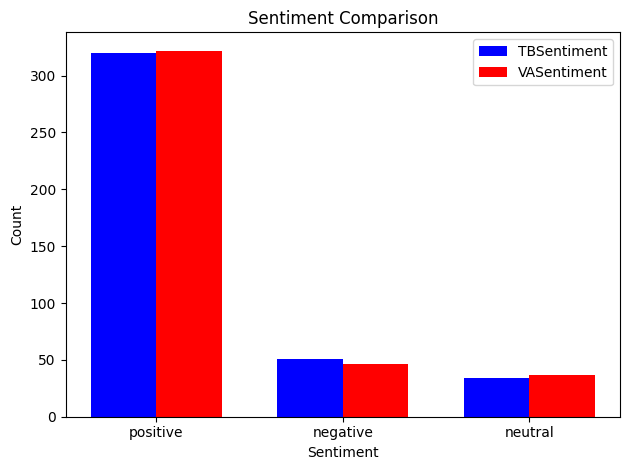

In [27]:
import matplotlib.pyplot as plt
tb_counts = Anna_Karenina_Book["TBSentiment"].value_counts()
va_counts = Anna_Karenina_Book["VASentiment"].value_counts()
categories = ["positive", "negative", "neutral"]
bar_width = 0.35
x = range(len(categories))

plt.bar(x, tb_counts, bar_width, label='TBSentiment', color='blue', align='center')
plt.bar([i + bar_width for i in x], va_counts, bar_width, label='VASentiment', color='red', align='center')

plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Comparison')
plt.xticks([i + bar_width/2 for i in x], categories)
plt.legend()

plt.tight_layout()
plt.show()


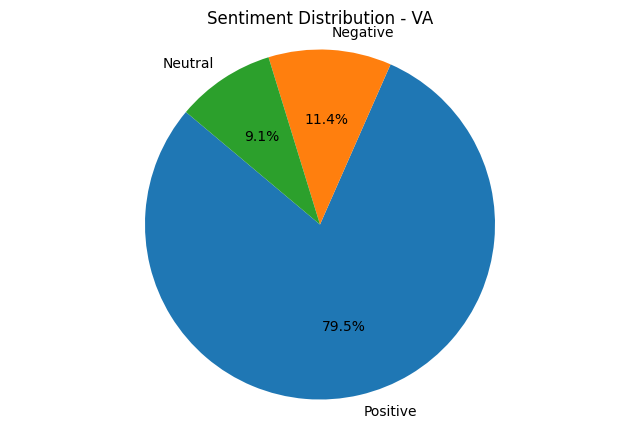

In [28]:
sentiment_counts = Anna_Karenina_Book['VASentiment'].value_counts()
plt.figure(figsize=(8, 5))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution - VA')
plt.axis('equal') 
plt.show()

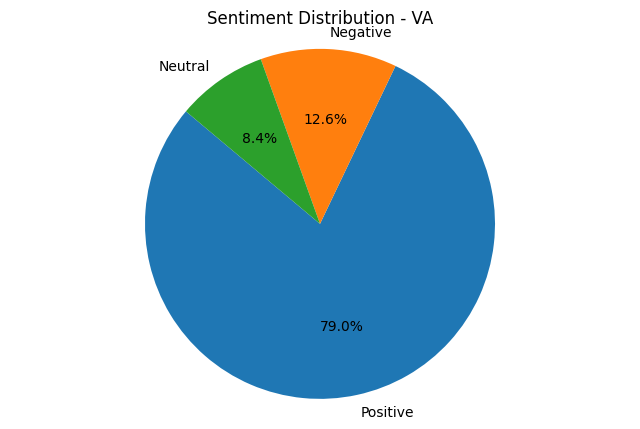

In [29]:
sentiment_counts = Anna_Karenina_Book['TBSentiment'].value_counts()
plt.figure(figsize=(8, 5))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution - VA')
plt.axis('equal') 
plt.show()

In [30]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from collections import Counter
import pandas as pd

sia = SentimentIntensityAnalyzer()

vpositive_words = []
vnegative_words = []
vneutral_words = []

for review in Anna_Karenina_Book['PreprocessedReviews']:
    words = review.split()  
    for word in words:
        sentiment_scores = sia.polarity_scores(word)
        compound_score = sentiment_scores['compound']
        
        if compound_score > 0.05:
            vpositive_words.append(word)
        elif compound_score < -0.05:
            vnegative_words.append(word)
        else:
            vneutral_words.append(word)

word_counts_positive = Counter(vpositive_words)
top_positive_words = word_counts_positive.most_common(10)

print("Top 10 Positive Words:")
for word, count in top_positive_words:
    print(f"{word}: {count} times")

word_counts_negative = Counter(vnegative_words)
top_negative_words = word_counts_negative.most_common(10)

print("\nTop 10 Negative Words:")
for word, count in top_negative_words:
    print(f"{word}: {count} times")

word_counts_neutral = Counter(vneutral_words)
top_neutral_words = word_counts_neutral.most_common(10)

print("\nTop 10 Neutral Words:")
for word, count in top_neutral_words:
    print(f"{word}: {count} times")


Top 10 Positive Words:
like: 230 times
love: 195 times
novel: 172 times
good: 95 times
well: 76 times
enjoyed: 68 times
great: 66 times
loved: 65 times
interesting: 61 times
liked: 51 times

Top 10 Negative Words:
hard: 39 times
bad: 34 times
death: 28 times
war: 28 times
tragic: 26 times
boring: 24 times
difficult: 18 times
tragedy: 17 times
hate: 16 times
hated: 16 times

Top 10 Neutral Words:
anna: 555 times
book: 555 times
tolstoy: 332 times
levin: 320 times
read: 292 times
characters: 260 times
story: 222 times
one: 212 times
time: 192 times
really: 186 times


In [106]:
positive_reviews = Anna_Karenina_Book[Anna_Karenina_Book["VASentiment"] == "Positive"]
negative_reviews = Anna_Karenina_Book[Anna_Karenina_Book["VASentiment"] == "Negative"]
neutral_reviews = Anna_Karenina_Book[Anna_Karenina_Book["VASentiment"] == "Neutral"]
print("Top Positive Reviews:")
print(positive_reviews['Review'].head())


Top Positive Reviews:
2    It's almost a 3.5 because honestly I really di...
3    Great book, nearly perfect, but 5 stars must b...
4    I cannot put half stars so imagine a 4.5\nBut ...
8    I enjoyed some parts, and it says something th...
9    I WILL finish this. i wanted to munch this so ...
Name: Review, dtype: object


In [107]:
print("Top Negative Reviews:")
print(negative_reviews['Review'].head())

Top Negative Reviews:
7      This is a story of politics, farming, indifel...
12    Longest story... Ever..\n\nFollowing the lives...
13    Oh Lawd, this was the longest, and at times mo...
15    Holy shit. This is one of my favorite books no...
26    this is the worst fucking book that has ever b...
Name: Review, dtype: object


In [108]:
print("Top Neutral Reviews:")
print(neutral_reviews['Review'].head())

Top Neutral Reviews:
0      so many thoughts. will write them down in a bit.
30    Started reading it only because of Aaron Taylo...
39                Will read later when I have more time
44                              A classic for a reason.
46    i wanted to give it three with the drag-throug...
Name: Review, dtype: object


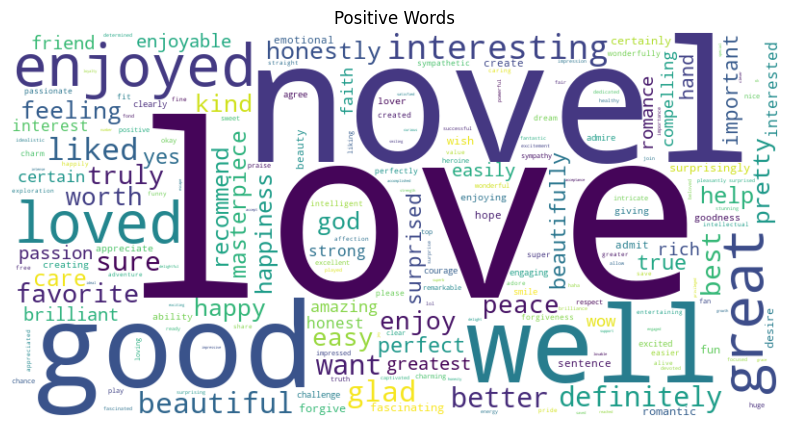

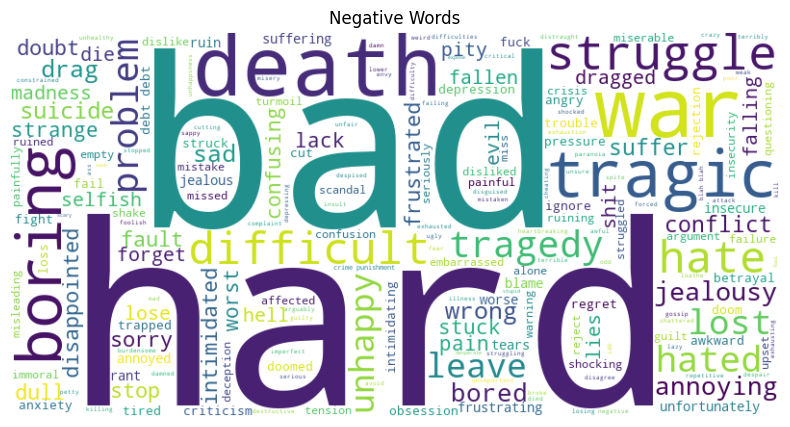

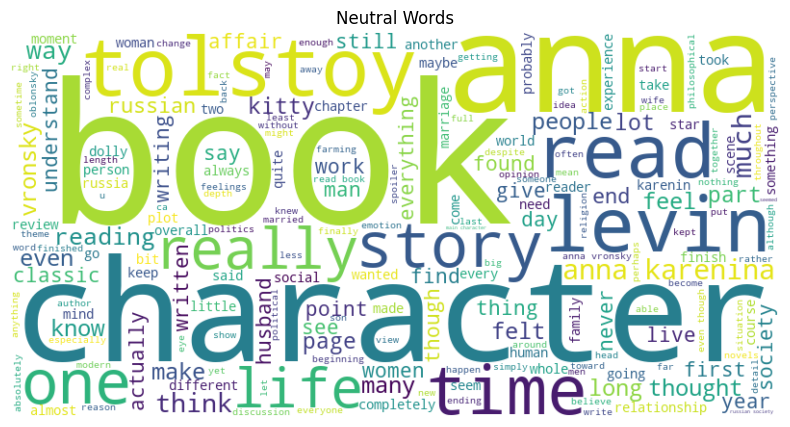

In [34]:
def create_word_cloud(words, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(words))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()

create_word_cloud(vpositive_words, "Positive Words")
create_word_cloud(vnegative_words, "Negative Words")
create_word_cloud(vneutral_words, "Neutral Words")

In [31]:
from textblob import TextBlob
from collections import Counter
import pandas as pd

positive_words = []
negative_words = []
neutral_words = []

for review in Anna_Karenina_Book['PreprocessedReviews']:
    words = TextBlob(review).words
    for word in words:
        word_polarity = TextBlob(word).sentiment.polarity
        if word_polarity > 0:
            positive_words.append(word)
        elif word_polarity < 0:
            negative_words.append(word)
        else:
            neutral_words.append(word)
word_counts_positive = Counter(positive_words)
top_positive_words = word_counts_positive.most_common(10)

print("Top 10 Positive Words:")
for word, count in top_positive_words:
    print(f"{word}: {count} times")
word_counts_negative = Counter(negative_words)
top_negative_words = word_counts_negative.most_common(10)

print("\nTop 10 Negative Words:")
for word, count in top_negative_words:
    print(f"{word}: {count} times")
word_counts_neutral = Counter(neutral_words)
top_neutral_words = word_counts_neutral.most_common(10)

print("\nTop 10 Neutral Words:")
for word, count in top_neutral_words:
    print(f"{word}: {count} times")


Top 10 Positive Words:
love: 195 times
really: 186 times
much: 156 times
many: 108 times
good: 95 times
first: 79 times
enjoyed: 68 times
great: 66 times
loved: 65 times
interesting: 61 times

Top 10 Negative Words:
long: 133 times
little: 50 times
hard: 39 times
bad: 34 times
complex: 31 times
least: 31 times
tragic: 26 times
boring: 24 times
half: 23 times
less: 21 times

Top 10 Neutral Words:
anna: 555 times
book: 555 times
tolstoy: 332 times
levin: 320 times
read: 292 times
characters: 260 times
like: 230 times
story: 222 times
one: 212 times
time: 192 times


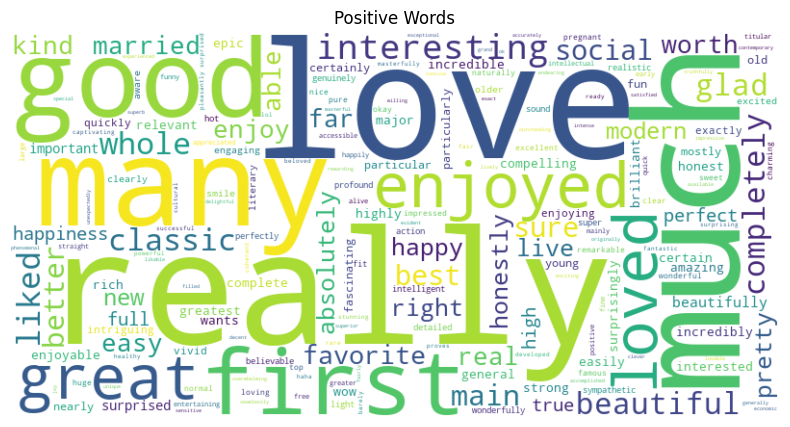

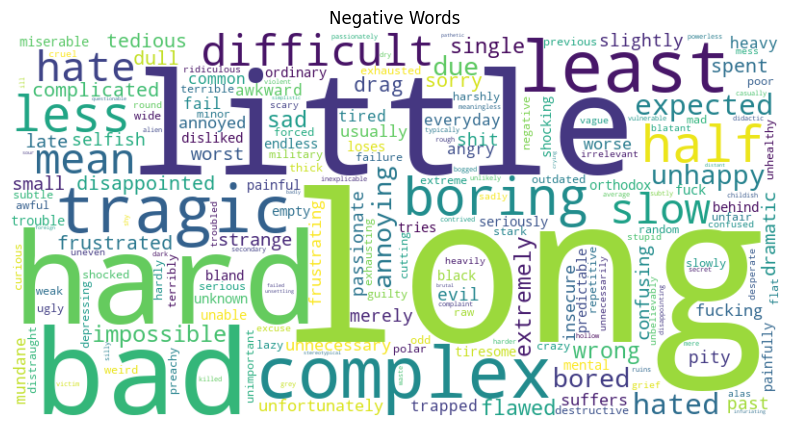

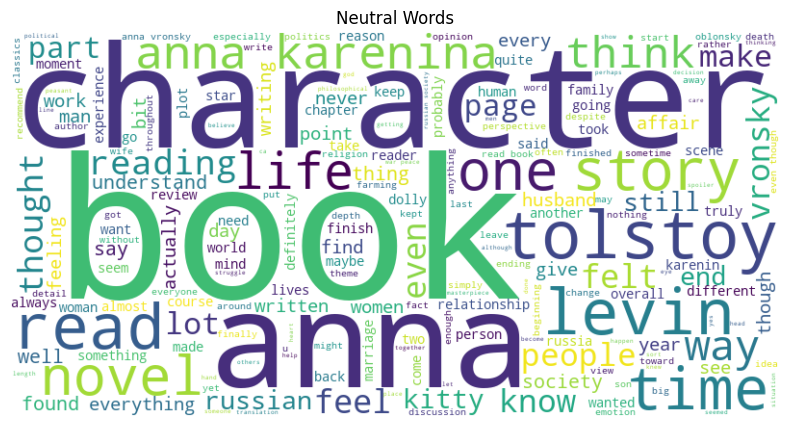

In [33]:
from wordcloud import WordCloud
def create_word_cloud(words, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(words))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()

create_word_cloud(positive_words, "Positive Words")
create_word_cloud(negative_words, "Negative Words")
create_word_cloud(neutral_words, "Neutral Words")

In [109]:
positive_reviews = Anna_Karenina_Book[Anna_Karenina_Book["TBSentiment"] == "Positive"]
negative_reviews = Anna_Karenina_Book[Anna_Karenina_Book["TBSentiment"] == "Negative"]
neutral_reviews = Anna_Karenina_Book[Anna_Karenina_Book["TBSentiment"] == "Neutral"]
print("Top Positive Reviews:")
print(positive_reviews['Review'].head())


Top Positive Reviews:
0     so many thoughts. will write them down in a bit.
2    It's almost a 3.5 because honestly I really di...
3    Great book, nearly perfect, but 5 stars must b...
4    I cannot put half stars so imagine a 4.5\nBut ...
8    I enjoyed some parts, and it says something th...
Name: Review, dtype: object


In [110]:
print("Top Positive Reviews:")
print(positive_reviews['Review'].head())

Top Positive Reviews:
7      This is a story of politics, farming, indifel...
9     I WILL finish this. i wanted to munch this so ...
21    I started this book with every intent to finis...
26    this is the worst fucking book that has ever b...
30    Started reading it only because of Aaron Taylo...
Name: Review, dtype: object


In [111]:
print("Top Positive Reviews:")
print(neutral_reviews['Review'].head())

Top Positive Reviews:
11    The level of detail in this book is truly hall...
39                Will read later when I have more time
43                                   Don't steal rolls.
57     I really enjoyed it. Such a moving book, so sad.
64                             Dnfing this finally @29%
Name: Review, dtype: object


In [64]:
firefox_options = Options()
firefox_options.add_argument('-headless')
firefox_binary_path = r"C:\Program Files\Mozilla Firefox\firefox.exe"
firefox_options.binary_location = firefox_binary_path
service = Service(executable_path=r"C:\Users\Ajay\Downloads\geckodriver-v0.33.0-win32\geckodriver.exe")
driver = webdriver.Firefox(service=service, options=firefox_options)
reviews_to_collect = 250
reviews_collected = 0
data = []  
url = "https://www.imdb.com/title/tt1781769/reviews/?ref_=tt_ov_rt"
try:
    driver.get(url)
    while reviews_collected < reviews_to_collect:
        try:
            loadMoreBtn = WebDriverWait(driver, 60).until(
                EC.element_to_be_clickable((By.ID, 'load-more-trigger'))
            )
            if loadMoreBtn:
                loadMoreBtn.click()
                print('Button clicked')
                
                WebDriverWait(driver, 30).until(
                    EC.presence_of_all_elements_located((By.XPATH, '//div[@class="content"]'))
                )
                
                reviews = driver.find_elements(By.XPATH, '//div[@class="review-container"]/div/a')
                ratings = driver.find_elements(By.XPATH, '//span[@class="rating-other-user-rating"]/span[1]')
                
                for review, rating in zip(reviews, ratings):
                    review_text = review.text
                    rating_text = rating.text
                    if rating_text and review_text:
                        url_rating_review = (url, rating_text, review_text)
                        data.append(url_rating_review)
                        reviews_collected += 1
                        print(f"Collected {reviews_collected} reviews")
                        if reviews_collected >= reviews_to_collect:
                            break
        except Exception as e:
            print(f"Error while scraping {url}: {e}")
            break

except Exception as e:
    print(f"Error: {e}")

finally:
    driver.quit()

Anna_Karenina_Movie = pd.DataFrame(data, columns=["URL", "Rating", "Review"])

Button clicked
Collected 1 reviews
Collected 2 reviews
Collected 3 reviews
Collected 4 reviews
Collected 5 reviews
Collected 6 reviews
Collected 7 reviews
Collected 8 reviews
Collected 9 reviews
Collected 10 reviews
Collected 11 reviews
Collected 12 reviews
Collected 13 reviews
Collected 14 reviews
Collected 15 reviews
Collected 16 reviews
Collected 17 reviews
Collected 18 reviews
Collected 19 reviews
Collected 20 reviews
Collected 21 reviews
Collected 22 reviews
Collected 23 reviews
Collected 24 reviews
Button clicked
Collected 25 reviews
Collected 26 reviews
Collected 27 reviews
Collected 28 reviews
Collected 29 reviews
Collected 30 reviews
Collected 31 reviews
Collected 32 reviews
Collected 33 reviews
Collected 34 reviews
Collected 35 reviews
Collected 36 reviews
Collected 37 reviews
Collected 38 reviews
Collected 39 reviews
Collected 40 reviews
Collected 41 reviews
Collected 42 reviews
Collected 43 reviews
Collected 44 reviews
Collected 45 reviews
Collected 46 reviews
Collected 47 

In [65]:
Anna_Karenina_Movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   URL     250 non-null    object
 1   Rating  250 non-null    object
 2   Review  250 non-null    object
dtypes: object(3)
memory usage: 6.0+ KB


In [66]:
missing_counts = Anna_Karenina_Movie.isnull().sum()
print(missing_counts)

URL       0
Rating    0
Review    0
dtype: int64


In [67]:
Anna_Karenina_Movie['Rating'] = Anna_Karenina_Movie['Rating'].astype('float') 
Anna_Karenina_Movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   URL     250 non-null    object 
 1   Rating  250 non-null    float64
 2   Review  250 non-null    object 
dtypes: float64(1), object(2)
memory usage: 6.0+ KB


In [68]:
Anna_Karenina_Movie['Rating'].mean()

4.864

In [69]:
def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    cleaned_text = ' '.join(tokens)
    return cleaned_text
Anna_Karenina_Movie['PreprocessedReviews'] = Anna_Karenina_Movie['Review'].apply(preprocess_text)
print(Anna_Karenina_Movie)


                                                   URL  Rating  \
0    https://www.imdb.com/title/tt1781769/reviews/?...     4.0   
1    https://www.imdb.com/title/tt1781769/reviews/?...     7.0   
2    https://www.imdb.com/title/tt1781769/reviews/?...     8.0   
3    https://www.imdb.com/title/tt1781769/reviews/?...     2.0   
4    https://www.imdb.com/title/tt1781769/reviews/?...    10.0   
..                                                 ...     ...   
245  https://www.imdb.com/title/tt1781769/reviews/?...    10.0   
246  https://www.imdb.com/title/tt1781769/reviews/?...     2.0   
247  https://www.imdb.com/title/tt1781769/reviews/?...     9.0   
248  https://www.imdb.com/title/tt1781769/reviews/?...     4.0   
249  https://www.imdb.com/title/tt1781769/reviews/?...     6.0   

                                                Review  \
0                                     A beautiful bore   
1    An interesting take on AK marred by pretentiou...   
2                              Al

In [70]:
nltk.download('punkt')
stemmer = PorterStemmer()
def stem_text(text):
    words = nltk.word_tokenize(text)
    stemmed_words = [stemmer.stem(word) for word in words]
    stemmed_text = ' '.join(stemmed_words)
    return stemmed_text
Anna_Karenina_Movie['StemmedReviews'] = Anna_Karenina_Movie['PreprocessedReviews'].apply(stem_text)
print(Anna_Karenina_Movie[['PreprocessedReviews', 'StemmedReviews']])

                            PreprocessedReviews  \
0                                beautiful bore   
1    interesting take ak marred pretentiousness   
2                                   world stage   
3           experiment gone pretentiously wrong   
4        sumptuous feast eye ear mind brilliant   
..                                          ...   
245      sumptuous feast eye ear mind brilliant   
246      hideous movie adaption tolstoy classic   
247                   beautiful enchanting bold   
248                              heat chemistry   
249        irritating format serious miscasting   

                            StemmedReviews  
0                              beauti bore  
1            interest take ak mar pretenti  
2                              world stage  
3               experi gone pretenti wrong  
4    sumptuou feast eye ear mind brilliant  
..                                     ...  
245  sumptuou feast eye ear mind brilliant  
246      hideou movi adapt 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ajay\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [71]:
from langdetect import detect
def detect_language(text):
    try:
        lang = detect(text)
        return lang == 'en'
    except:
        return False

Anna_Karenina_Movie['IsEnglish'] = Anna_Karenina_Movie['PreprocessedReviews'].apply(detect_language)
Anna_Karenina_Movie = Anna_Karenina_Movie[Anna_Karenina_Movie['IsEnglish']]


In [72]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

for index, row in Anna_Karenina_Movie.iterrows():
    review_text = row['PreprocessedReviews']
    sentiment_scores = analyzer.polarity_scores(review_text)
    
    if sentiment_scores['compound'] >= 0.05:
        vasentiment = 'Positive'
    elif sentiment_scores['compound'] <= -0.05:
        vasentiment = 'Negative'
    else:
        vasentiment = 'Neutral'
    
    Anna_Karenina_Movie.at[index, 'VASentiment'] = vasentiment

print(Anna_Karenina_Movie[['Rating','PreprocessedReviews', 'VASentiment']])


     Rating                     PreprocessedReviews VASentiment
0       4.0                          beautiful bore    Positive
3       2.0     experiment gone pretentiously wrong    Negative
4      10.0  sumptuous feast eye ear mind brilliant    Positive
5       2.0  hideous movie adaption tolstoy classic     Neutral
6       9.0               beautiful enchanting bold    Positive
..      ...                                     ...         ...
245    10.0  sumptuous feast eye ear mind brilliant    Positive
246     2.0  hideous movie adaption tolstoy classic     Neutral
247     9.0               beautiful enchanting bold    Positive
248     4.0                          heat chemistry     Neutral
249     6.0    irritating format serious miscasting    Negative

[128 rows x 3 columns]


In [75]:
Anna_Karenina_Movie['VASentiment'].nunique()

3

In [74]:
from textblob import TextBlob
def get_sentiment_polarity(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'
Anna_Karenina_Movie['TBSentiment'] = Anna_Karenina_Movie['PreprocessedReviews'].apply(get_sentiment_polarity)

print(Anna_Karenina_Movie[['Rating', 'PreprocessedReviews', 'TBSentiment']])


     Rating                     PreprocessedReviews TBSentiment
0       4.0                          beautiful bore    Positive
3       2.0     experiment gone pretentiously wrong    Negative
4      10.0  sumptuous feast eye ear mind brilliant    Positive
5       2.0  hideous movie adaption tolstoy classic    Positive
6       9.0               beautiful enchanting bold    Positive
..      ...                                     ...         ...
245    10.0  sumptuous feast eye ear mind brilliant    Positive
246     2.0  hideous movie adaption tolstoy classic    Positive
247     9.0               beautiful enchanting bold    Positive
248     4.0                          heat chemistry     Neutral
249     6.0    irritating format serious miscasting    Negative

[128 rows x 3 columns]


In [46]:
Anna_Karenina_Movie['TBSentiment'].nunique()

2

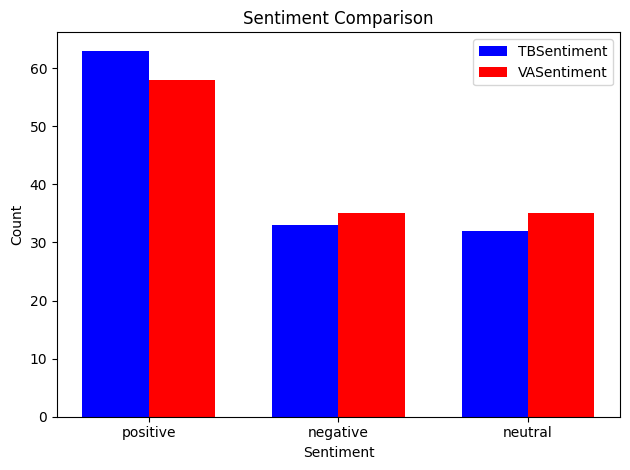

In [76]:
import matplotlib.pyplot as plt
tb_counts = Anna_Karenina_Movie["TBSentiment"].value_counts()
va_counts = Anna_Karenina_Movie["VASentiment"].value_counts()
categories = ["positive", "negative","neutral"]
bar_width = 0.35
x = range(len(categories))

plt.bar(x, tb_counts, bar_width, label='TBSentiment', color='blue', align='center')
plt.bar([i + bar_width for i in x], va_counts, bar_width, label='VASentiment', color='red', align='center')

plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Comparison')
plt.xticks([i + bar_width/2 for i in x], categories)
plt.legend()

plt.tight_layout()
plt.show()


In [91]:
positive_reviews = Anna_Karenina_Movie[Anna_Karenina_Movie["VASentiment"] == "Positive"]
negative_reviews = Anna_Karenina_Movie[Anna_Karenina_Movie["VASentiment"] == "Negative"]
neutral_reviews = Anna_Karenina_Movie[Anna_Karenina_Movie["VASentiment"] == "Neutral"]
print("Top Positive Reviews:")
print(positive_reviews['Review'].head())

Top Positive Reviews:
0                                      A beautiful bore
4     A Sumptuous Feast for the Eye and Ear and Mind...
6                        Beautiful, Enchanting and Bold
9                                A Very Creative Effort
17                                 Brilliant adaptation
Name: Review, dtype: object


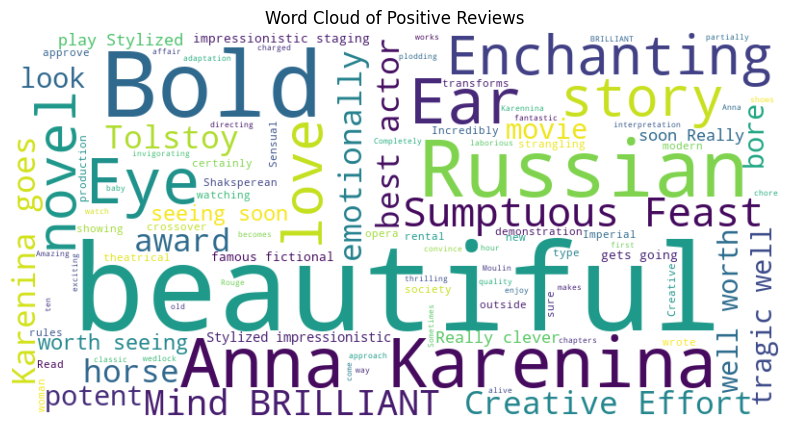

In [92]:
from wordcloud import WordCloud
positive_reviews_text = ' '.join(positive_reviews['Review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Positive Reviews")
plt.show()

In [85]:
print("\nTop Negative Reviews:")
print(negative_reviews['Review'].head(5))



Top Negative Reviews:
3                An Experiment Gone Pretentiously Wrong
8              Irritating Format and Serious Miscasting
11    Despite the Wonderful Art Direction and Costum...
15    Contrived, forced and pretentious, this movie ...
20    Horribly Miscast - The Sophie Marceau version ...
Name: Review, dtype: object


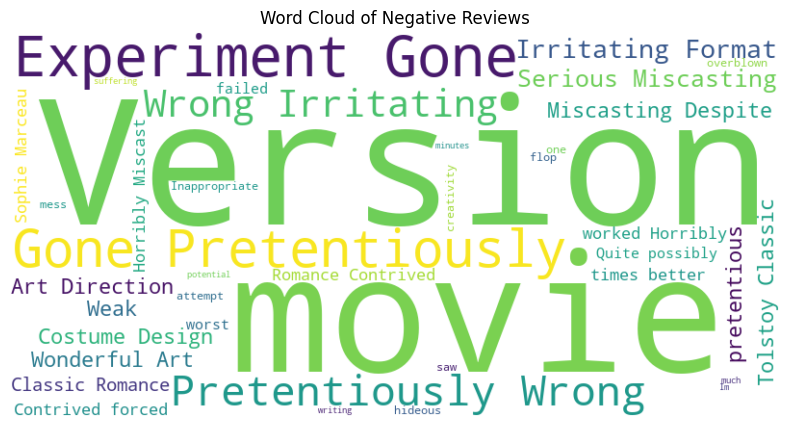

In [102]:
from wordcloud import WordCloud
positive_reviews_text = ' '.join(negative_reviews['Review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Negative Reviews")
plt.show()

In [86]:
print("\nTop Neutral Reviews:")
print(neutral_reviews['Review'].head())


Top Neutral Reviews:
5     Hideous movie adaption of a Tolstoy classic
7                            no heat no chemistry
29    Hideous movie adaption of a Tolstoy classic
31                           no heat no chemistry
50                          Waiting for the train
Name: Review, dtype: object


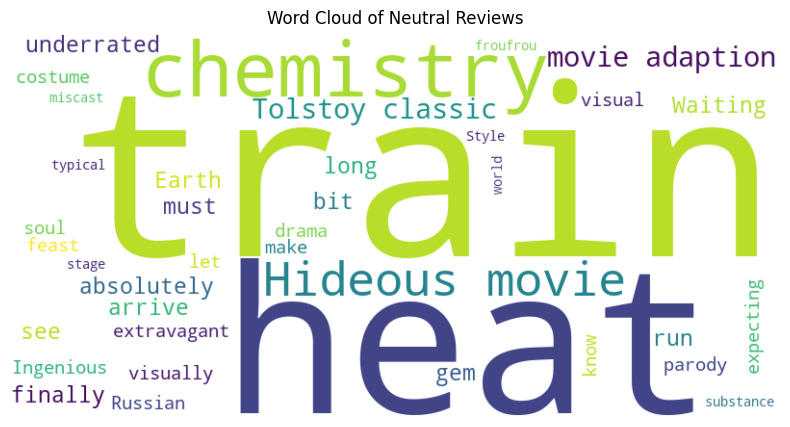

In [103]:
from wordcloud import WordCloud
positive_reviews_text = ' '.join(neutral_reviews['Review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Neutral Reviews")
plt.show()

In [88]:
positive_reviewstb = Anna_Karenina_Movie[Anna_Karenina_Movie["TBSentiment"] == "Positive"]
negative_reviewstb = Anna_Karenina_Movie[Anna_Karenina_Movie["TBSentiment"] == "Negative"]
neutral_reviewstb = Anna_Karenina_Movie[Anna_Karenina_Movie["TBSentiment"] == "Neutral"]
print("Top Positive Reviews:")
print(positive_reviewstb['Review'].head())


Top Positive Reviews:
0                                     A beautiful bore
4    A Sumptuous Feast for the Eye and Ear and Mind...
5          Hideous movie adaption of a Tolstoy classic
6                       Beautiful, Enchanting and Bold
9                               A Very Creative Effort
Name: Review, dtype: object


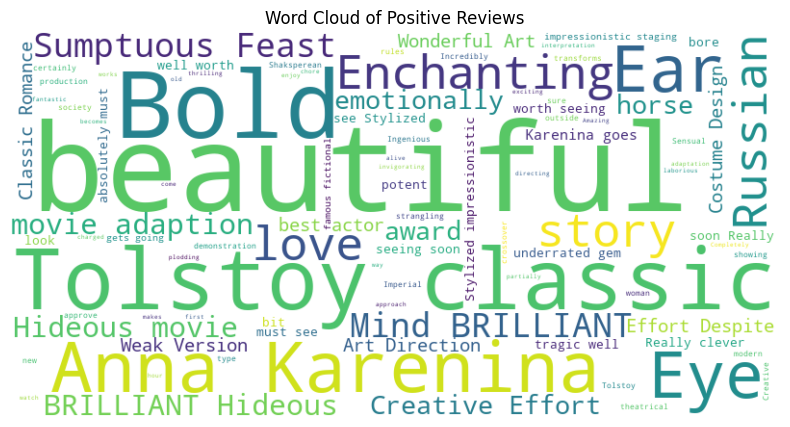

In [98]:
from wordcloud import WordCloud
positive_reviews_text = ' '.join(positive_reviewstb['Review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Positive Reviews")
plt.show()

In [89]:
print("\nTop Negative Reviews:")
print(negative_reviewstb['Review'].head(5))



Top Negative Reviews:
3                An Experiment Gone Pretentiously Wrong
8              Irritating Format and Serious Miscasting
15    Contrived, forced and pretentious, this movie ...
20    Horribly Miscast - The Sophie Marceau version ...
27               An Experiment Gone Pretentiously Wrong
Name: Review, dtype: object


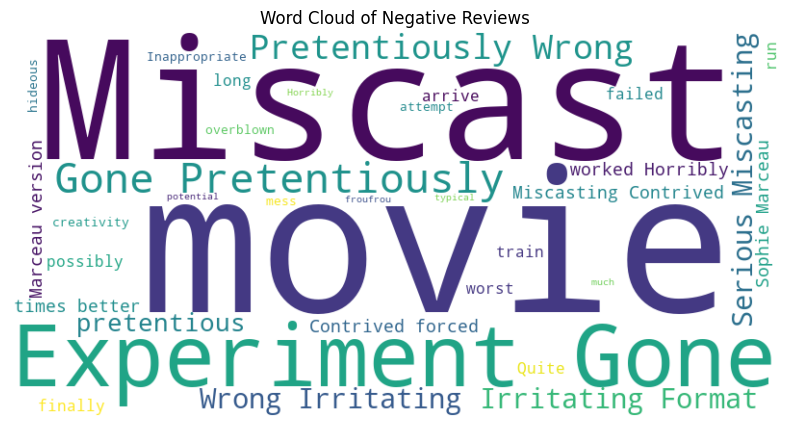

In [104]:
from wordcloud import WordCloud
positive_reviews_text = ' '.join(negative_reviewstb['Review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Negative Reviews")
plt.show()

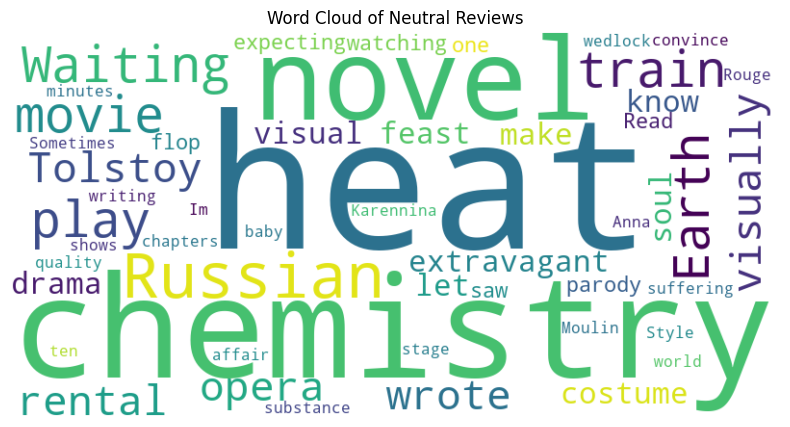

In [105]:
from wordcloud import WordCloud
positive_reviews_text = ' '.join(neutral_reviewstb['Review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Neutral Reviews")
plt.show()